In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib.cm as cm

In [11]:
# load data
data = pd.read_csv("admissionsData.csv")
languages = list(data["Language 1"])
total = len(languages)
uniqueLangs = []
counts = []
for lang in languages:
    if lang not in uniqueLangs:
        if lang is not np.nan:
            uniqueLangs.append(lang)
            counts.append(1)
    else:
        counts[uniqueLangs.index(lang)]+=1
#plt.pie(counts,labels=uniqueLangs)
#plt.show()

# finds all langs spoken at home
homeLangs1 = data[data["Language 1 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 1","Language 1 Proficiency"]]
homeLangs2 = data[data["Language 2 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 2","Language 2 Proficiency"]]
homeLangs3 = data[data["Language 3 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 3","Language 3 Proficiency"]]
homeLangs4 = data[data["Language 4 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 4","Language 4 Proficiency"]]
homeLangs5 = data[data["Language 5 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 5","Language 5 Proficiency"]]
# num of total langs spoken at home
totalHomeLangs = float(len(homeLangs1)+len(homeLangs2)+len(homeLangs3)+len(homeLangs4)+len(homeLangs5))


# numbers of languages spoken at home
homeCounts = []
for lang in range(len(uniqueLangs)):
    homeCounts.append(0)
    homeCounts[lang]+= len(homeLangs1[homeLangs1["Language 1"]==uniqueLangs[lang]])
    homeCounts[lang]+= len(homeLangs2[homeLangs2["Language 2"]==uniqueLangs[lang]])
    homeCounts[lang]+= len(homeLangs3[homeLangs3["Language 3"]==uniqueLangs[lang]])
    homeCounts[lang]+= len(homeLangs4[homeLangs4["Language 4"]==uniqueLangs[lang]])
    homeCounts[lang]+= len(homeLangs5[homeLangs5["Language 5"]==uniqueLangs[lang]])

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.80392157e-01 3.38158275e-01 9.85162233e-01 1.00000000e+00]
 [6.07843137e-02 6.36474236e-01 9.41089253e-01 1.00000000e+00]
 [1.66666667e-01 8.66025404e-01 8.66025404e-01 1.00000000e+00]
 [3.86274510e-01 9.84086337e-01 7.67362681e-01 1.00000000e+00]
 [6.13725490e-01 9.84086337e-01 6.41213315e-01 1.00000000e+00]
 [8.33333333e-01 8.66025404e-01 5.00000000e-01 1.00000000e+00]
 [1.00000000e+00 6.36474236e-01 3.38158275e-01 1.00000000e+00]
 [1.00000000e+00 3.38158275e-01 1.71625679e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


/var/folders/32/14wzkv1d38q3fxdwkkhh_dcr0000gn/T/ipykernel_11863/3237419524.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ourPercents.append(float(ours[lang]))
/var/folders/32/14wzkv1d38q3fxdwkkhh_dcr0000gn/T/ipykernel_11863/3237419524.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ourPercents.append(float(ours[lang]))
/var/folders/32/14wzkv1d38q3fxdwkkhh_dcr0000gn/T/ipykernel_11863/3237419524.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ourPercents.append(float(ours[lang]))
/var/folders/32/14wzkv1d38q3fxdwkkhh_dcr0000gn/T/ipykernel_11863/3237419524.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use flo

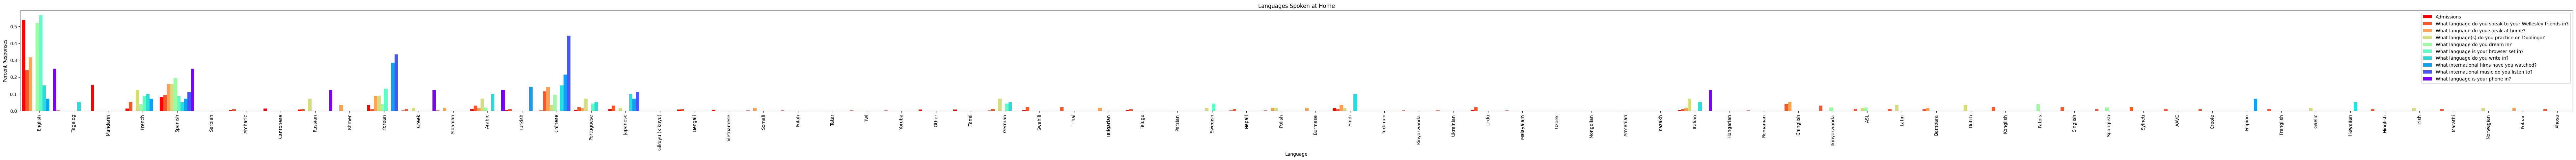

In [70]:
# percents of the langs spoken at home from admissions data
homePercents = []
for x in homeCounts:
    homePercents.append(float(x)/totalHomeLangs)

ourLangs = pd.read_csv("percentData.csv").columns[1:]
allLangs = list(uniqueLangs)
for lang in ourLangs:
    if lang not in allLangs:
        allLangs.append(lang)
for i in range(len(allLangs)-len(uniqueLangs)):
        homePercents.append(0)
#plt.pie(homePercents,labels=uniqueLangs)
#plt.show()

# percents of langs spoken at home from our data
def getLangData(csv_path,question):
    ours = pd.read_csv(csv_path)
    ours = ours[ours["LANGUAGE"]==question]
    ourLangs = ours.columns[1:]
    
    ourPercents = []
    for lang in allLangs:
        try:
            ourPercents.append(float(ours[lang]))
        except:
            ourPercents.append(0)
    return ourPercents


csv = "percentData.csv"
questions = pd.read_csv(csv)['LANGUAGE']

colors = cm.rainbow(np.linspace(0, 1, len(questions)+1))
colors = colors[:len(questions)+1]
print(colors)
colors = np.flip(colors,axis=0)

x_axis = np.arange(len(allLangs))*(len(questions)+1)
f, ax = plt.subplots(figsize=(100,8))
ax.bar(x_axis,homePercents,label="Admissions",width=1,color=colors[0])


for i in range(len(questions)):
    percents = getLangData(csv,questions[i])
    ax.bar(x_axis+i+1,percents,label=questions[i],width=1,color=colors[i+1])

plt.xticks(x_axis+len(questions)/2,allLangs,rotation=90,fontsize=10)
plt.subplots_adjust(bottom=0.5)
plt.legend()
plt.title("Languages Spoken at Home")
plt.ylabel("Percent Responses")
plt.xlabel("Language")
plt.xlim(left=-1,right=x_axis[-1]+len(questions))
plt.show()

In [60]:
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.76862745, 0.61176471, 0.58039216, 1.        ],
       [0.96862745, 0.71372549, 0.82352941, 1.        ],
       [0.78039216, 0.78039216, 0.78039216, 1.        ],
       [0.85882353, 0.85882353, 0.55294118, 1.        ],
       [0.61960784, 0.85490196, 0.89803922, 1.        ]])

In [13]:
data["Admit Term"].value_counts()

Admit Term
Fall 2021    615
Fall 2022    605
Fall 2024    604
Fall 2020    592
Fall 2023    589
Name: count, dtype: int64

In [14]:
# bar chart--- include the data for each question
# axis titles
# table
# anything to show the data for each question

In [15]:
allLangs

['English',
 'Tagalog',
 'Mandarin',
 'French',
 'Spanish',
 'Serbian',
 'Amharic',
 'Cantonese',
 'Russian',
 'Khmer',
 'Korean',
 'Greek',
 'Albanian',
 'Arabic',
 'Turkish',
 'Chinese',
 'Portuguese',
 'Japanese',
 'Gikuyu (Kikuyu)',
 'Bengali',
 'Vietnamese',
 'Somali',
 'Fulah',
 'Tatar',
 'Twi',
 'Yoruba',
 'Other',
 'Tamil',
 'German',
 'Swahili',
 'Thai',
 'Bulgarian',
 'Telugu',
 'Persian',
 'Swedish',
 'Nepali',
 'Polish',
 'Burmese',
 'Hindi',
 'Turkmen',
 'Kinyarwanda',
 'Ukrainian',
 'Urdu',
 'Malayalam',
 'Uzbek',
 'Mongolian',
 'Armenian',
 'Kazakh',
 'Italian',
 'Hungarian',
 'Romanian',
 'Chinglish',
 'Bambara',
 'Pulaar']